<a href="https://colab.research.google.com/github/chavezgranados/machine-learning/blob/main/TPP2/sesion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="gotham" color="purple"> **MACHINE LEARNING IN ECONOMICS 2025: SESIÓN 2**</font>


`Luis Chávez`

![texto del vínculo](https://dais.chbe.ubc.ca/assets/thumbnails/neural.png)

# <font face="gotham" color="purple"> **1. Regresión lineal múltiple**</font>

## <font face="gotham" color="purple"> **1.1 Preámbulo**</font>

En primer lugar, se carga las librerías:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

Ahora se carga los datos:

In [ ]:
# Abrir files .csv
#data = pd.read_csv('econ_data.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install wooldridge

In [ ]:
import wooldridge as woo

In [ ]:
woo.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [ ]:
df1=woo.data('wage2')
df1.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


**Más detalles del data set:**

https://rdrr.io/cran/wooldridge/man/wage2.html

In [ ]:
# Cambio de nombre de variables
# ==============================================================================
df1 = df1.rename(columns={"wage": "salario", "KWW": "conoc_mund"})

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salario     935 non-null    int64  
 1   hours       935 non-null    int64  
 2   IQ          935 non-null    int64  
 3   conoc_mund  935 non-null    int64  
 4   educ        935 non-null    int64  
 5   exper       935 non-null    int64  
 6   tenure      935 non-null    int64  
 7   age         935 non-null    int64  
 8   married     935 non-null    int64  
 9   black       935 non-null    int64  
 10  south       935 non-null    int64  
 11  urban       935 non-null    int64  
 12  sibs        935 non-null    int64  
 13  brthord     852 non-null    float64
 14  meduc       857 non-null    float64
 15  feduc       741 non-null    float64
 16  lwage       935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [ ]:
# Missing
df1.isna().sum(axis=0)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
salario,0
hours,0
IQ,0
conoc_mund,0
educ,0
exper,0
tenure,0
age,0
married,0
black,0


In [ ]:
# Imputación usando KNN (vecinos más cercanos)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) # Puedes ajustar n_neighbors
df1[['brthord','meduc','feduc']] = imputer.fit_transform(df1[['brthord','meduc','feduc']]) # Aplicar la imputación solo a las columnas deseadas

In [ ]:
# Verificamos
print(df1.isnull().sum())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


salario       0
hours         0
IQ            0
conoc_mund    0
educ          0
exper         0
tenure        0
age           0
married       0
black         0
south         0
urban         0
sibs          0
brthord       0
meduc         0
feduc         0
lwage         0
dtype: int64


## <font face="gotham" color="purple"> **1.2 Descriptivas**</font>

In [ ]:
# Resumen estadístico univariado
# ==============================================================================
df1['salario'].describe()

,salario
count,935.000000
mean,957.945455
std,404.360822
min,115.000000
25%,669.000000
50%,905.000000
75%,1160.000000
max,3078.000000


In [ ]:
# Resumen estadístico global
# ==============================================================================
df1.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,salario,hours,IQ,conoc_mund,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.275953,10.625306,10.027955,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.538713,2.758622,3.091227,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable1','variable2','r']
    corr_mat = corr_mat.loc[corr_mat['variable1'] != corr_mat['variable2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

corr_matrix = df1.select_dtypes(include=['float64', 'int64']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(3)) # top 3 más correlacionadas

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variable1,variable2,r,abs_r
272,lwage,salario,0.953141,0.953141
16,salario,lwage,0.953141,0.953141
269,feduc,meduc,0.588878,0.588878


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


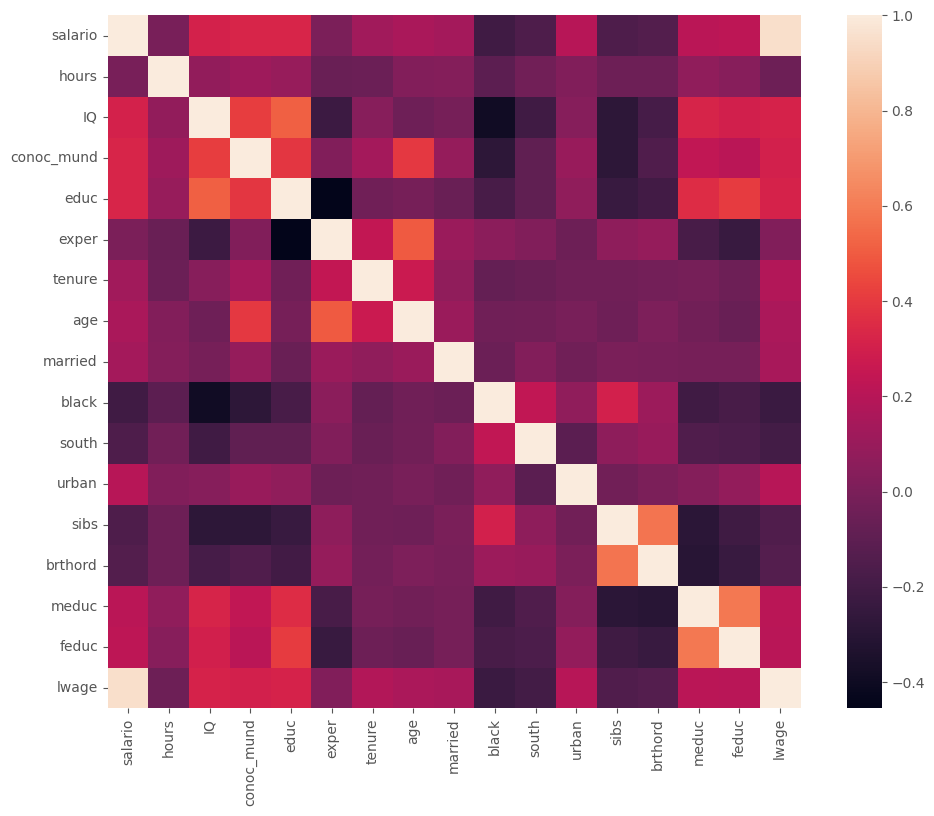

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 10)

In [ ]:
# Quitando del análisis las variables dummy
# ==============================================================================
numeric_cols = df1.select_dtypes(include=np.number).columns
dummy_cols = [col for col in numeric_cols if df1[col].nunique() == 2 and all(x in [0,1] for x in df1[col].unique())]
numeric_cols = list(set(numeric_cols) - set(dummy_cols))
df1[numeric_cols].describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sibs,educ,age,tenure,conoc_mund,lwage,IQ,hours,feduc,meduc,brthord,exper,salario
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2.941176,13.468449,33.080214,7.234225,35.744385,6.779004,101.282353,43.929412,10.027955,10.625306,2.275953,11.563636,957.945455
std,2.306254,2.196654,3.107803,5.075206,7.638788,0.421144,15.052636,7.224256,3.091227,2.758622,1.538713,4.374586,404.360822
min,0.000000,9.000000,28.000000,0.000000,12.000000,4.744932,50.000000,20.000000,0.000000,0.000000,1.000000,1.000000,115.000000
25%,1.000000,12.000000,30.000000,3.000000,31.000000,6.505783,92.000000,40.000000,8.000000,9.000000,1.000000,8.000000,669.000000
50%,2.000000,12.000000,33.000000,7.000000,37.000000,6.807935,102.000000,40.000000,10.000000,12.000000,2.000000,11.000000,905.000000
75%,4.000000,16.000000,36.000000,11.000000,41.000000,7.056175,112.000000,48.000000,12.000000,12.000000,3.000000,15.000000,1160.000000
max,14.000000,18.000000,38.000000,22.000000,56.000000,8.032035,145.000000,80.000000,18.000000,18.000000,10.000000,23.000000,3078.000000


In [ ]:
# DF sin las dummy
#===========================================================
df2 = df1.drop(columns=dummy_cols)
df2.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,salario,hours,IQ,conoc_mund,educ,exper,tenure,age,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,2.0,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,10,6.0,6.0,11.0,6.331502


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


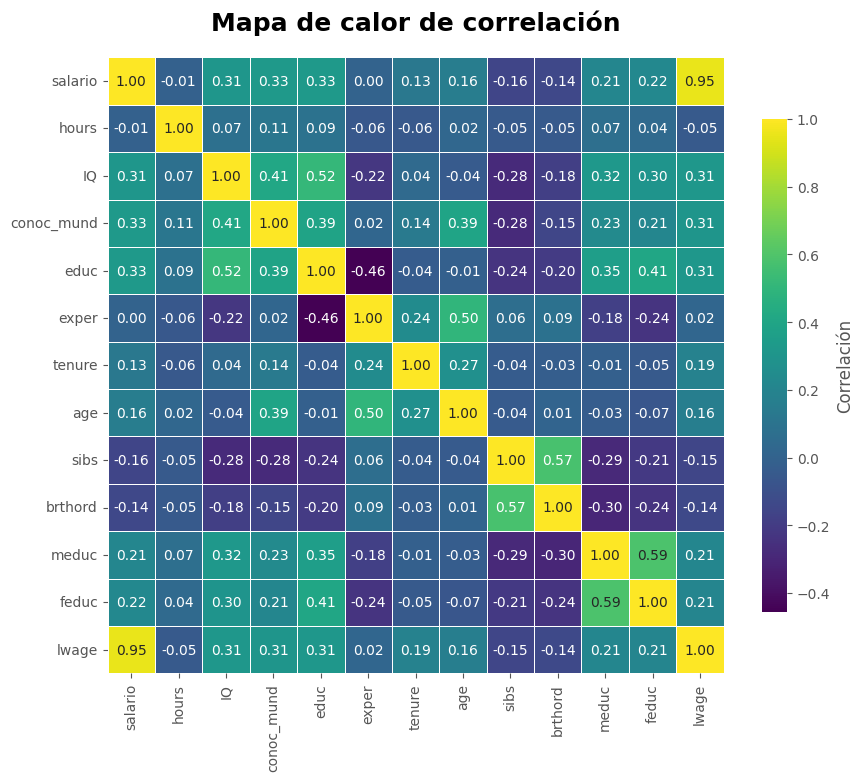

In [ ]:
corr_matrix2 = df2.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix2,
    square=True,
    annot=True,         # Mostrar valores de correlación
    fmt=".2f",          # Formato de las cifras
    cmap="viridis",    # Colores elegantes
    linewidths=0.5,     # Separación entre celdas
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'}
)
ax.set_title("Mapa de calor de correlación", fontsize=18, fontweight="bold", pad=20)
plt.show()

In [ ]:
# Exportando imágenes
# ==============================================================================
fig.savefig('fig1.png')
from google.colab import files
files.download("fig1.png")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font face="gotham" color="purple"> **1.3 Regresión típica**</font>

In [ ]:
# División de los datos en train y test: performance del modelo
# ==============================================================================
X = df1.drop(columns=['lwage','salario'])
y = df1['lwage']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Estandarización de datos con StandardScaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train) # Ajusta y transforma el conjunto de entrenamiento
X_testN= scaler.transform(X_test)       # Transforma el conjunto de prueba

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Estimación del modelo
# ==============================================================================
modelo1 = LinearRegression()
modelo1.fit(X_trainN, y_train)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


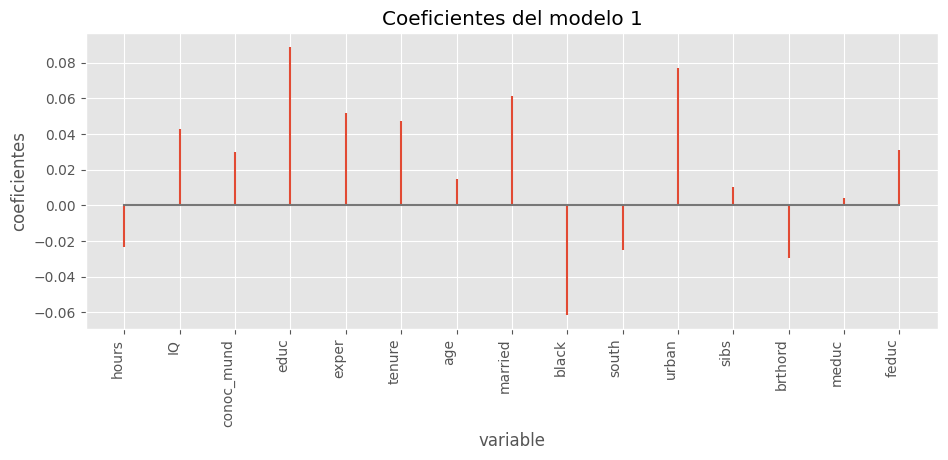

In [ ]:
# Gráfico de coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo1.coef_.flatten()} )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo 1');

In [ ]:
resultados = pd.DataFrame({'variable': X.columns, 'coef': modelo1.coef_[0]})
resultados

,variable,coef
0,hours,-0.023154
1,IQ,0.042961
2,conoc_mund,0.030138
3,educ,0.089085
4,exper,0.051828
5,tenure,0.047144
6,age,0.014666
7,married,0.061186
8,black,-0.061723
9,south,-0.024770


In [ ]:
# Predicciones con el test
# ==============================================================================
predicciones = modelo1.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([7.07954079, 6.76833254, 7.09008683, 7.01172091, 6.96102065,
       6.58502417, 6.84847185, 6.93807152, 6.66329048, 7.0037736 ])

In [ ]:
# Coeficiente de determinación
# ==============================================================================
print("R^2:", modelo1.score(X_testN, y_test))

R^2: 0.29201335711633214


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Error de la base test del modelo
# ==============================================================================
MSE = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones, )
print("")
print(f"El error (MSE) de test es: {MSE}")


El error (MSE) de test es: 0.12089334499432738


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RMSE = np.sqrt(MSE)
print("")
print(f"El error (RMSE) de test es: {RMSE}")


El error (RMSE) de test es: 0.34769720302919804


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recordar que:
$$RMSE=\sqrt{\dfrac{1}{n}\sum_{i=1}^n(y_{true,i}-y_{pred,i})^2}$$

Asimismo, hay otras métricas (**funciones de pérdida**) como el $R^2$ y el MAE:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{true}, i} - y_{\text{pred}, i} \right|$$

# <font face="gotham" color="purple"> **2. Regresión Ridge**</font>

In [ ]:
# Creación y entrenamiento del modelo (búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo2 = RidgeCV(
            alphas          = np.logspace(-10, 10, 200),
            fit_intercept   = True,
            store_cv_results = True
         )

_ = modelo2.fit(X = X_trainN, y = y_train)

**Nota**: cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de $\lambda$ así como la evolución del error de validación cruzada en función del $\lambda$ empleado.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


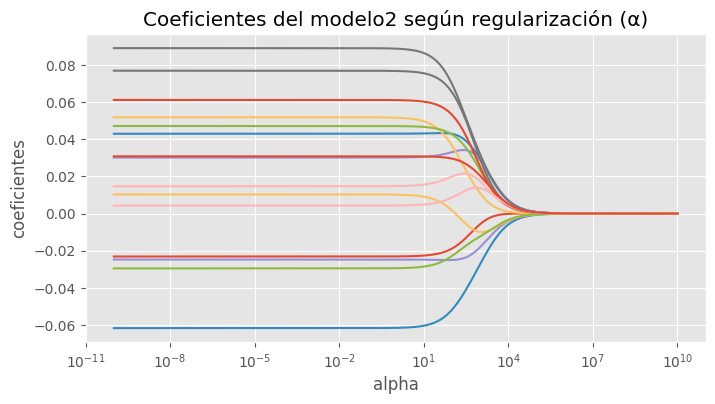

In [ ]:
# Evolución de coeficientes en función de alpha
# ==============================================================================
alphas = modelo2.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo2 según regularización (α)');
plt.axis('tight')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


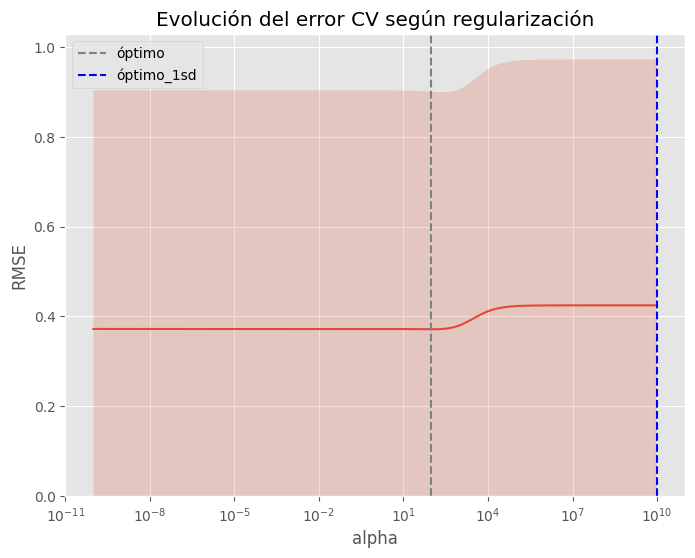

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
mse_cv = modelo2.cv_results_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo2.cv_results_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo2.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo2.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(modelo2.alphas, rmse_cv)
ax.fill_between(
    modelo2.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV según regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha: {modelo2.alpha_}")

Mejor valor de alpha: 91.15888299750837


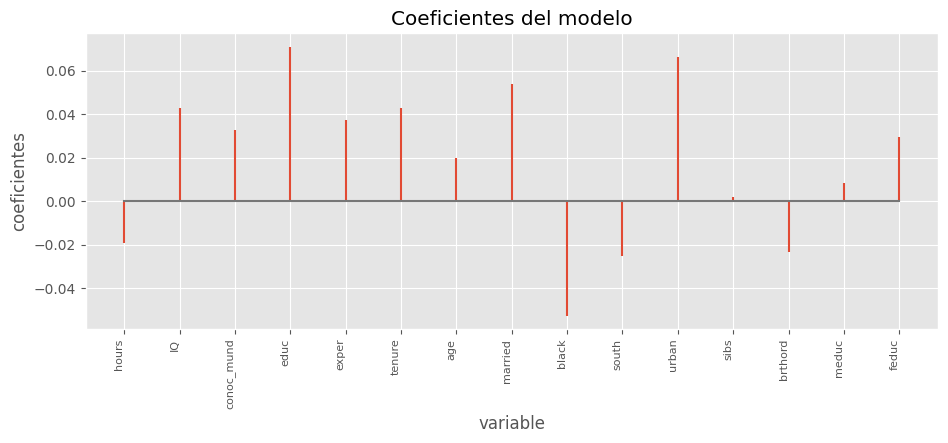

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo2.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=8)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo2.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

array([7.06609186, 6.77059399, 7.08980677, 6.98388048, 6.95183954,
       6.61883214, 6.82865801, 6.92351684, 6.63638258, 6.97970047])

In [ ]:
# Error de test del modelo
# ==============================================================================
MSE_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones)
print("")
print(f"El error (MSE Ridge) de test es: {MSE_ridge}")


El error (MSE Ridge) de test es: 0.12172244307336953


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RMSE_ridge = np.sqrt(MSE_ridge)
print("")
print(f"El error (RMSE Ridge) de test es: {RMSE_ridge}")


El error (RMSE Ridge) de test es: 0.34888743610707673


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font face="gotham" color="purple"> **3. Regresión LASSO**</font>

In [ ]:
# Entrenamiento del modelo (búsqueda por CV del valor óptimo alpha)
# ==============================================================================
modelo3 = LassoCV(
            alphas          = np.logspace(-10, 10, 200),
            cv              = 10)
_ = modelo3.fit(X = X_trainN, y = y_train.ravel())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


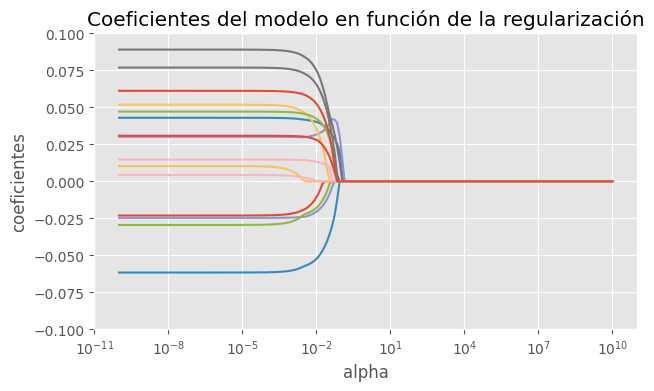

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo3.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.1,0.1]) # Ajustar
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


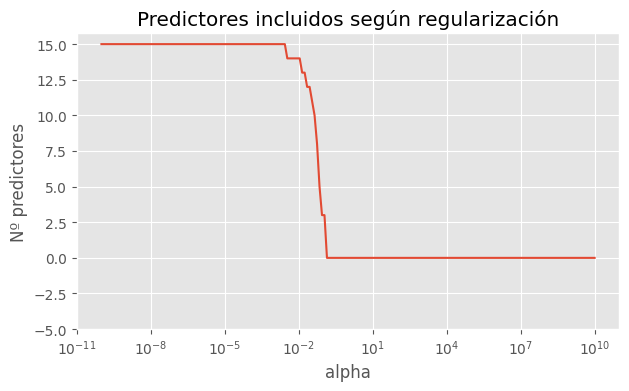

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo3.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('Nº predictores')
ax.set_title('Predictores incluidos según regularización');

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


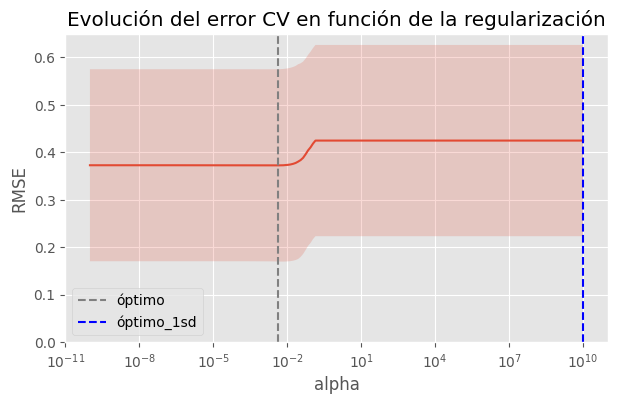

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
mse_cv = modelo3.mse_path_.mean(axis=1)
mse_sd = modelo3.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo3.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo3.alphas_[rmse_cv == min_rsme_1sd][0] #Se elige el primer elemento

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(modelo3.alphas_, rmse_cv)
ax.fill_between(modelo3.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2)

ax.axvline(x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd')

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha: {modelo3.alpha_}")

Mejor valor de alpha: 0.004347013158125026


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo3.coef_.flatten()})

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,hours,-0.017700
1,IQ,0.041436
2,conoc_mund,0.030081
3,educ,0.082799
4,exper,0.044587
5,tenure,0.045102
6,age,0.014168
7,married,0.057566
8,black,-0.056561
9,south,-0.023459


**Nota**: puede visualizarse que la variable `sibs` no está presente. Verificamos:

In [ ]:
relevantes = df_coeficientes[df_coeficientes.coef != 0]
irrelevantes= df_coeficientes[df_coeficientes.coef == 0]

print("Variables relevantes:")
print(relevantes)
print("\nVariables irrelevantes:")
print(irrelevantes)

Variables relevantes:
     predictor      coef
0        hours -0.017700
1           IQ  0.041436
2   conoc_mund  0.030081
3         educ  0.082799
4        exper  0.044587
5       tenure  0.045102
6          age  0.014168
7      married  0.057566
8        black -0.056561
9        south -0.023459
10       urban  0.071705
12     brthord -0.021575
13       meduc  0.002085
14       feduc  0.029846

Variables irrelevantes:
   predictor  coef
11      sibs   0.0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo3.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([7.05954906, 6.77693337, 7.08124314, 7.00342588, 6.96187506,
       6.60064215, 6.8354382 , 6.93351589, 6.65848545, 6.99409911])

In [ ]:
# Error de test del modelo
# ==============================================================================
MSE_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones)
print("")
print(f"El error (MSE LASSO) de test es: {MSE_lasso}")


El error (MSE LASSO) de test es: 0.12180935284661341


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RMSE_lasso= np.sqrt(MSE_lasso)
print("")
print(f"El error (RMSE LASSO) de test es: {RMSE_lasso}")


El error (RMSE LASSO) de test es: 0.34901196662380135


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font face="gotham" color="purple"> **4. Conclusiones**</font>

## <font face="gotham" color="purple"> **4.1 Comparación**</font>

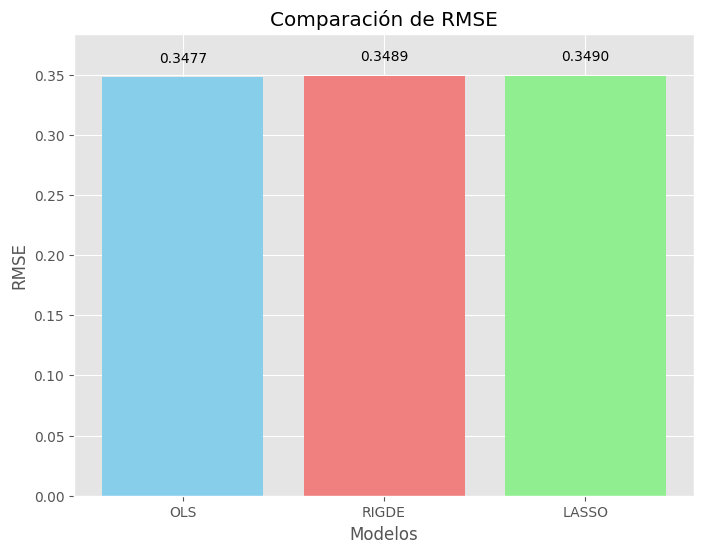

In [ ]:
modelos = ['OLS', 'RIGDE', 'LASSO']
rmse_values = [RMSE, RMSE_ridge, RMSE_lasso]

plt.figure(figsize=(8, 6))
plt.bar(modelos, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.title("Comparación de RMSE")
plt.ylim(0, max(rmse_values) * 1.1)

for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

**CONCLUSIÓN: el mejor de todos es RIDGE**

## <font face="gotham" color="purple"> **4.2 Reflexiones**</font>



*   El cambio en el tamaño del train puede generar resultados diferentes.
*   Asintóticamente, OLS puede ser el mejor bajo no colinealidad.  Ridge también puede ser útil pero supeditado a colinealidad.
*   LASSO permite quitar variables irrelevates.




# <font face="gotham" color="purple"> **5. Árboles de decisión**</font>

En general, se suelen utilizar para tareas de `regresión` y `clasificación`. A lo primero se denomina **árboles de regresión** y es muy útil cuando el target es contínuo y los datos no ofrecen relaciones lineales.

Algunos conceptos básicos aquí:
https://www.ibm.com/es-es/topics/decision-trees

## <font face="gotham" color="purple"> **5.1 Modelación**</font>

In [ ]:
# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [ ]:
df1=woo.data('wage2')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [ ]:
df1 = df1.drop(columns='lwage')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
dtypes: float64(3), int64(13)
memory usage: 117.0 KB


In [ ]:
# División de los datos en entrenamiento y prueba
# ------------------------------------------------------------------------------
X_trainA, X_testA, y_trainA, y_testA = train_test_split(
                                        df1.drop(columns ="wage"),
                                        df1['wage'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelito = DecisionTreeRegressor(
            max_depth         = 3, #profundidad
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelito.fit(X_trainA, y_trainA)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


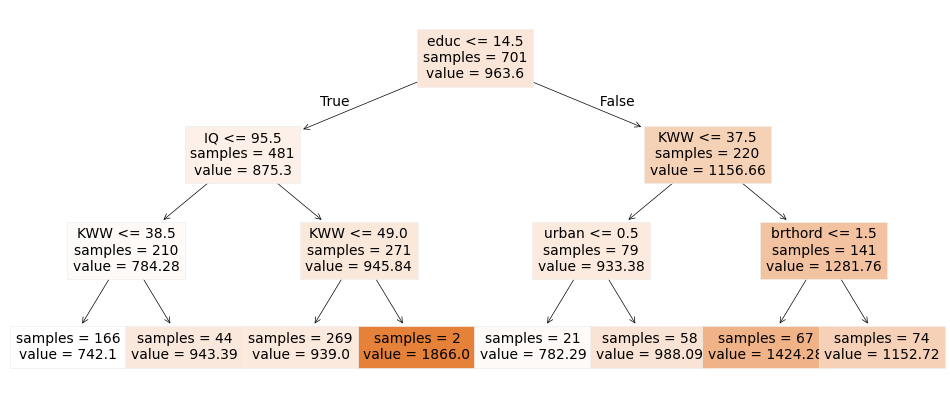

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelito.get_depth()}")
print(f"Número de nodos terminales: {modelito.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelito,
            feature_names = df1.drop(columns = "wage").columns,
            class_names   = ['wage'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelito = export_text(
                    decision_tree = modelito,
                    feature_names = list(df1.drop(columns = "wage").columns)
               )
print(texto_modelito)

|--- educ <= 14.50
|   |--- IQ <= 95.50
|   |   |--- KWW <= 38.50
|   |   |   |--- value: [742.10]
|   |   |--- KWW >  38.50
|   |   |   |--- value: [943.39]
|   |--- IQ >  95.50
|   |   |--- KWW <= 49.00
|   |   |   |--- value: [939.00]
|   |   |--- KWW >  49.00
|   |   |   |--- value: [1866.00]
|--- educ >  14.50
|   |--- KWW <= 37.50
|   |   |--- urban <= 0.50
|   |   |   |--- value: [782.29]
|   |   |--- urban >  0.50
|   |   |   |--- value: [988.09]
|   |--- KWW >  37.50
|   |   |--- brthord <= 1.50
|   |   |   |--- value: [1424.28]
|   |   |--- brthord >  1.50
|   |   |   |--- value: [1152.72]



**Predictores importantes:**

In [ ]:
importancia = pd.DataFrame(
                            {'predictor': df1.drop(columns = "wage").columns,
                             'importancia': modelito.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,educ,0.433833
2,KWW,0.336189
1,IQ,0.112125
12,brthord,0.094147
10,urban,0.023707
0,hours,0.000000
4,exper,0.000000
5,tenure,0.000000
6,age,0.000000
7,married,0.000000


## <font face="gotham" color="purple"> **4.1 Podado del árbol (pruning)**</font>

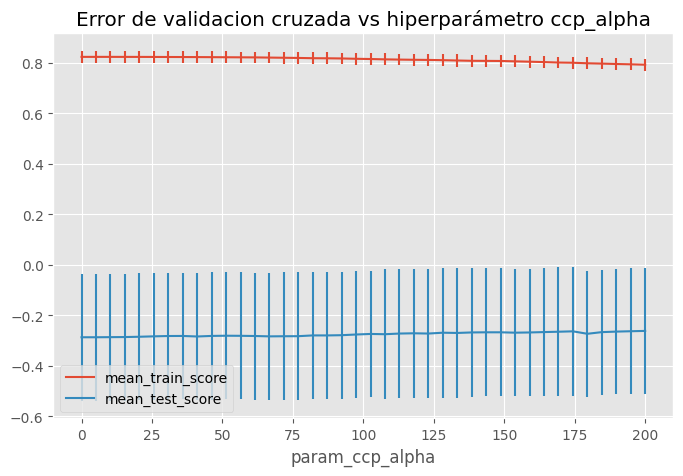

In [ ]:
# Pruning por validación cruzada
# ------------------------------------------------------------------------------
# Optimización de valores del hiperparámetro de poda "ccp_alpha"
param_grid = {'ccp_alpha':np.linspace(0, 200, 40)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 4,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_trainA, y_trainA)

fig, ax = plt.subplots(figsize=(8, 5))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 200.0}

**¿El problema?** overfitting.

In [ ]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelito.predict(X = X_testA)

mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (MSE) de test es: {mse}")

El error (MSE) de test es: 120043.55872922804


**Fuente:**
Códigos estraídos de https://cienciadedatos.net/.

`¿Esto es todo?` NO, sólo es el primer paso.

Ejemplos:


*   **Kernel Ridge:**
combina la regresión RIDGE con el kernel trick para ajustar relaciones no lineales entre características.
*   **Gaussian Process Regressor:** utiliza un enfoque probabilístico para modelar la relación entre las características y el target; cada predicción se modela como una distribución gaussiana.